## 1.문제정의 
#### 악성(malignant)과 양성(benign)종양 예측
#### 지도학습 /분류

## 2. 데이터 수집

In [26]:
# from 패키지명.라이브러리명 import 함수명
# 패키지: 라이브러리의  집합
#라이브러리: 함수들의 집합
from sklearn.datasets import load_breast_cancer

In [27]:
dataset=load_breast_cancer()

In [28]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [29]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## 3.데이터 전처리

In [30]:
import pandas as pd

In [31]:
X=pd.DataFrame(dataset.data,columns=dataset.feature_names)
y=pd.Series(dataset.target,name='cancer')

In [32]:
print(X.shape)

(569, 30)


In [33]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
print(y.shape)

(569,)


In [35]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cancer, dtype: int32

In [36]:
y.value_counts()

1    357
0    212
Name: cancer, dtype: int64

In [37]:
print(dataset.target_names)

['malignant' 'benign']


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

## 4.모델선택 knn

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
knn=KNeighborsClassifier(n_neighbors=1)

#### train ,test 나누기

In [42]:
# random_state=매번 데이터셋이 변경되는 것을 방지하기위해 임의숫자를 써주는게 좋음
# stratify: 훈련/테스트데이터의 1,0의 비율을 유지 
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,
                                                 stratify=y,random_state=1)

In [43]:
knn=KNeighborsClassifier(n_neighbors=9)

## 5.학습

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

## 6.평가

In [45]:
knn.score(X_test,y_test)

0.9415204678362573

In [46]:
for k in range(1,30,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # k :1 ,정확도 : 000
    print("k: {},정확도 : {:.3f}".format(k,knn.score(X_test,y_test)))

k: 1,정확도 : 0.912
k: 3,정확도 : 0.930
k: 5,정확도 : 0.930
k: 7,정확도 : 0.936
k: 9,정확도 : 0.942
k: 11,정확도 : 0.936
k: 13,정확도 : 0.936
k: 15,정확도 : 0.930
k: 17,정확도 : 0.930
k: 19,정확도 : 0.924
k: 21,정확도 : 0.930
k: 23,정확도 : 0.924
k: 25,정확도 : 0.924
k: 27,정확도 : 0.918
k: 29,정확도 : 0.918


In [47]:
#k값이 9일때 정확도가 94% 가장 높다 

In [51]:
train_accuracy=[]
test_accuracy=[]
neighbors=range(1,30,2)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

In [52]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

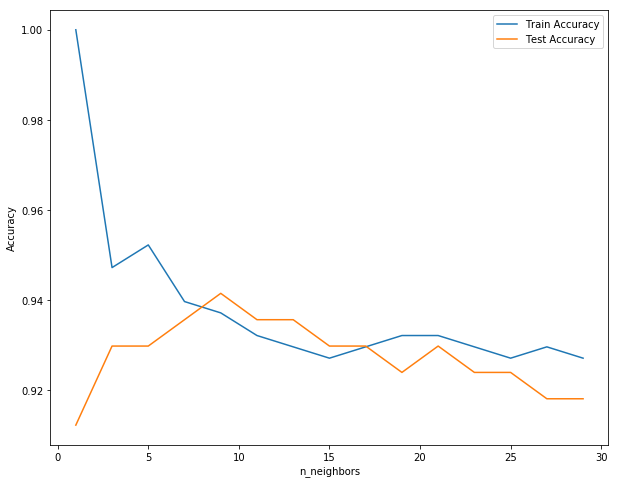

In [53]:
plt.figure(figsize=(10,8))
plt.plot(neighbors,train_accuracy, label="Train Accuracy")
plt.plot(neighbors,test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## 표준 스케일링
#### 평균이 0이고 분산이 1인 정규분포를 만들어줌

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_sc=scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

In [56]:
X_train_sc=pd.DataFrame(X_train_sc,columns=X_train.columns)

In [57]:
knn=KNeighborsClassifier(n_neighbors=3)

In [60]:
knn.fit(X_train_sc,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [61]:
knn.score(X_test_sc,y_test)

0.9707602339181286